In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# DATA FILES

In [2]:
vehicules= pd.read_csv('/home/fitec/PROJET/out_clean/vehicules.csv',dtype=str)
usagers=pd.read_csv('/home/fitec/PROJET/out_clean/usagers.csv',dtype=str)
charac=pd.read_csv('/home/fitec/PROJET/out_clean/caracteristiques.csv',dtype=str)
lieux=pd.read_csv('/home/fitec/PROJET/out_clean/lieux.csv',dtype=str)

In [3]:
vehicules.info()
#vehicules['catv']=vehicules['catv'].astype('category')
vehicules['catv']=vehicules['catv'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635811 entries, 0 to 1635810
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   Num_Acc  1635811 non-null  object
 1   catv     1635811 non-null  object
 2   num_veh  1635811 non-null  object
 3   year     1635811 non-null  object
dtypes: object(4)
memory usage: 49.9+ MB


In [4]:
usagers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142195 entries, 0 to 2142194
Data columns (total 12 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   Num_Acc  object
 1   place    object
 2   catu     object
 3   grav     object
 4   sexe     object
 5   trajet   object
 6   secu     object
 7   an_nais  object
 8   num_veh  object
 9   year     object
 10  dc       object
 11  age      object
dtypes: object(12)
memory usage: 196.1+ MB


In [5]:
#usagers[['place','catu','grav','sexe','trajet','secu','dc']]=usagers[['place','catu','grav','sexe','trajet','secu','dc']].astype('category')
usagers[['place','catu','grav','sexe','trajet','secu']]=usagers[['place','catu','grav','sexe','trajet','secu']].astype('int64')

usagers['age']=usagers['age'].astype('float64')

In [6]:
lieux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Num_Acc  958469 non-null  object
 1   catr     958469 non-null  object
 2   circ     958469 non-null  object
 3   surf     958469 non-null  object
 4   situ     958469 non-null  object
 5   year     958469 non-null  object
dtypes: object(6)
memory usage: 43.9+ MB


In [7]:
#lieux[['catr','circ','surf','situ']]=lieux[['catr','circ','surf','situ']].astype('category')
lieux[['catr','circ','surf','situ']]=lieux[['catr','circ','surf','situ']].astype('int64')


In [8]:
charac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958469 entries, 0 to 958468
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Num_Acc  958469 non-null  object
 1   an       958469 non-null  object
 2   mois     958469 non-null  object
 3   jour     958469 non-null  object
 4   hrmn     958469 non-null  object
 5   lum      958469 non-null  object
 6   agg      958469 non-null  object
 7   atm      958469 non-null  object
 8   com      958467 non-null  object
 9   adr      816550 non-null  object
 10  gps      480052 non-null  object
 11  lat      471401 non-null  object
 12  long     468188 non-null  object
 13  dep      958469 non-null  object
 14  year     958469 non-null  object
 15  cp       958467 non-null  object
 16  h24      958469 non-null  object
dtypes: object(17)
memory usage: 124.3+ MB


In [9]:
#charac[['lum','agg','atm']]=charac[['lum','agg','atm']].astype('category')
charac[['lum','agg','atm']]=charac[['lum','agg','atm']].astype('int64')

# MISE EN COMMUN DES DONNEES

In [10]:
df_once=charac.merge(lieux,on=['Num_Acc','year']).drop(['adr'],axis=1)
df_dbl=usagers.merge(vehicules,on=['Num_Acc','num_veh','year'])

In [11]:
df_rdc=df_once.merge(df_dbl,on=['Num_Acc','year'])

In [12]:
df_rdc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142173 entries, 0 to 2142172
Data columns (total 31 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Num_Acc  object 
 1   an       object 
 2   mois     object 
 3   jour     object 
 4   hrmn     object 
 5   lum      int64  
 6   agg      int64  
 7   atm      int64  
 8   com      object 
 9   gps      object 
 10  lat      object 
 11  long     object 
 12  dep      object 
 13  year     object 
 14  cp       object 
 15  h24      object 
 16  catr     int64  
 17  circ     int64  
 18  surf     int64  
 19  situ     int64  
 20  place    int64  
 21  catu     int64  
 22  grav     int64  
 23  sexe     int64  
 24  trajet   int64  
 25  secu     int64  
 26  an_nais  object 
 27  num_veh  object 
 28  dc       object 
 29  age      float64
 30  catv     int64  
dtypes: float64(1), int64(14), object(16)
memory usage: 523.0+ MB


In [13]:
df_rdc[['an','mois','h24','cp','lat','long','year']]=df_rdc[['an','mois','h24','cp','lat','long','year']].astype('float64')
#df_rdc['year']=df_rdc['year'].astype('float64')

In [14]:
df_rdc['lat']=df_rdc.loc[:,'lat']/100000

In [15]:
df_rdc['long']=df_rdc.loc[:,'long']/100000

In [16]:
vehicules.head()

,Num_Acc,catv,num_veh,year
0,200500000001,7,A01,2005
1,200500000001,7,B02,2005
2,200500000002,7,A01,2005
3,200500000002,2,B02,2005
4,200500000003,2,A01,2005


In [17]:
df_rdc.isna().sum()*100/len(df_rdc)

Num_Acc     0.000000
an          0.000000
mois        0.000000
jour        0.000000
hrmn        0.000000
lum         0.000000
agg         0.000000
atm         0.000000
com         0.000280
gps        48.808850
lat        49.756626
long       50.094740
dep         0.000000
year        0.000000
cp          0.000280
h24         0.000000
catr        0.000000
circ        0.000000
surf        0.000000
situ        0.000000
place       0.000000
catu        0.000000
grav        0.000000
sexe        0.000000
trajet      0.000000
secu        0.000000
an_nais     0.000000
num_veh     0.000000
dc          0.000000
age         0.000000
catv        0.000000
dtype: float64

In [15]:
df_rdc.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,atm,com,gps,...,catu,grav,sexe,trajet,secu,an_nais,num_veh,dc,age,catv
0,200500000001,5.0,1.0,12,1900,3,2,1,011,M,...,1,4,1,1,11,1976.0,A01,0,44.0,07
1,200500000001,5.0,1.0,12,1900,3,2,1,011,M,...,1,3,2,3,11,1968.0,B02,0,52.0,07
2,200500000001,5.0,1.0,12,1900,3,2,1,011,M,...,2,1,1,0,11,1964.0,B02,0,56.0,07
3,200500000001,5.0,1.0,12,1900,3,2,1,011,M,...,2,1,1,0,31,2004.0,B02,0,16.0,07
4,200500000001,5.0,1.0,12,1900,3,2,1,011,M,...,2,1,1,0,11,1998.0,B02,0,22.0,07


# EXPLORATION

In [1]:
## analyses bivariées

In [ ]:
pd.crosstab(usagers["dc"],crtrtic["lum"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],crtrtic["agg"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],crtrtic["atm"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],lieux["catr"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],lieux["circ"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],lieux["surf"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],lieux["situ"],margins=True)

In [66]:
pd.crosstab(usagers["dc"],vehicules["catv"],margins=True)

catv,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,99,All
dc,,,,,,,,,,,,,,,,,,,,,
0,66113,85230,5630,7280,21197,37,988893,119,295,79445,...,111578,16579,428,1870,10162,2828,371,1759,6389,1590867
1,1816,2401,149,183,619,2,27928,1,5,2295,...,3103,470,9,42,319,82,11,67,172,44944
All,67929,87631,5779,7463,21816,39,1016821,120,300,81740,...,114681,17049,437,1912,10481,2910,382,1826,6561,1635811


In [ ]:
pd.crosstab(usagers["dc"],usagers["place"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],usagers["catu"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],usagers["secu"],margins=True)

In [ ]:
pd.crosstab(usagers["dc"],usagers["sexe"],margins=True)

In [16]:
# MATRICES DE CORRELATION

In [17]:
print(df_rdc.corr())

            an      mois       lat      long      year        cp       h24  \
an    1.000000  0.002988  0.422194 -0.002287  1.000000  0.029570  0.012856   
mois  0.002988  1.000000 -0.019077 -0.005841  0.002988 -0.004415 -0.006528   
lat   0.422194 -0.019077  1.000000 -0.005109  0.422194 -0.020220  0.002815   
long -0.002287 -0.005841 -0.005109  1.000000 -0.002287  0.005857 -0.001480   
year  1.000000  0.002988  0.422194 -0.002287  1.000000  0.029570  0.012856   
cp    0.029570 -0.004415 -0.020220  0.005857  0.029570  1.000000  0.018156   
h24   0.012856 -0.006528  0.002815 -0.001480  0.012856  0.018156  1.000000   
age  -0.177368 -0.007922 -0.075844 -0.002095 -0.177368 -0.030021 -0.008289   

           age  
an   -0.177368  
mois -0.007922  
lat  -0.075844  
long -0.002095  
year -0.177368  
cp   -0.030021  
h24  -0.008289  
age   1.000000  


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

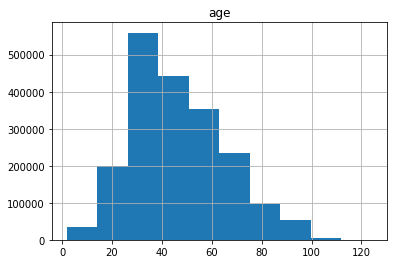

In [18]:
# HISTOGRAMME DES AGES
df_rdc.hist(column='age')

array([<AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

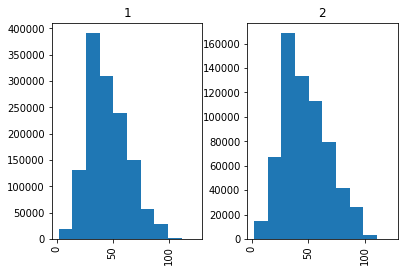

In [19]:
# HISTOGRAMME DE L'AGE SELON LE SEXE
df_rdc.hist(column='age',by='sexe')

<AxesSubplot:title={'center':'age'}, xlabel='sexe'>

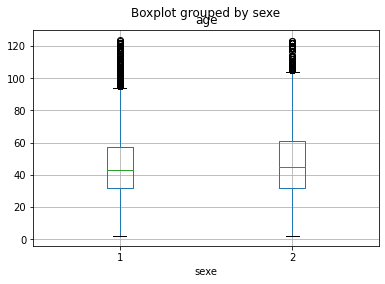

In [23]:
df_rdc.boxplot(column='age',by='sexe')

<AxesSubplot:xlabel='grav', ylabel='age'>

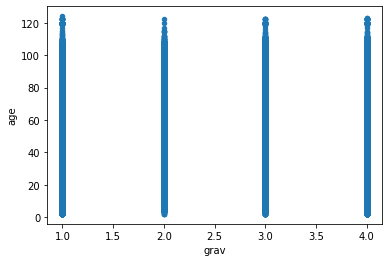

In [193]:
#scatterplot : age vs. grav
df_rdc.plot.scatter(x='grav',y='age')

Text(0, 0.5, 'Accident count')

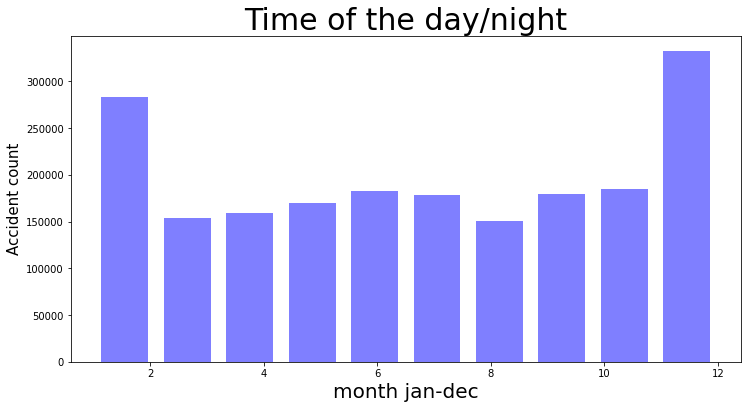

In [18]:
# HISTOGRAMME du mois de l acc
plt.figure(figsize=(12,6))
df_rdc.mois.hist(rwidth=0.75,alpha =0.50, color= 'blue')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('month jan-dec' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

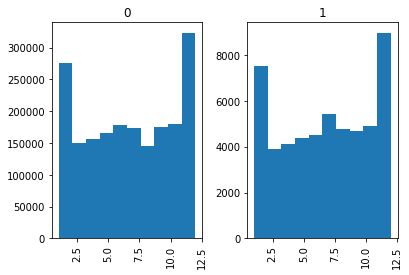

In [198]:
# HISTOGRAMME DE L'l heure de l acc
df_rdc.hist(column='mois', by='dc')

Text(0, 0.5, 'Accident count')

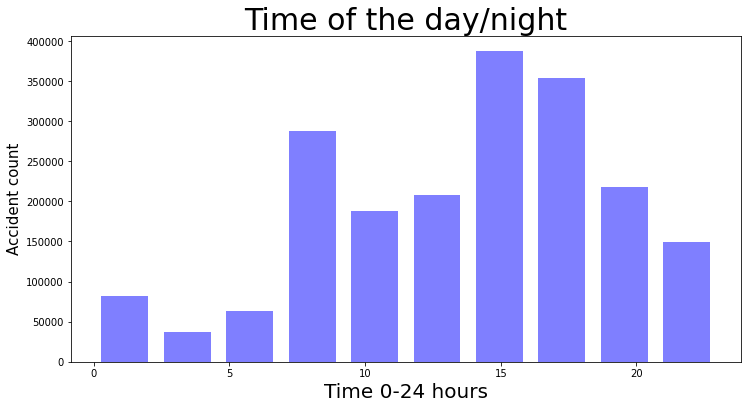

In [19]:
plt.figure(figsize=(12,6))
df_rdc.h24.hist(rwidth=0.75,alpha =0.50, color= 'blue')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-24 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

In [205]:
df_rdc.h24.mean()

27.675639268805625

In [25]:
# PAIR SCATTER
#pd.tools.plotting.scatter_matrix(df_rdc.select_dtypes(exclude=['object']))

In [ ]:
610164057

In [49]:
df_rdc['dc'].value_counts()

0    1923032
1      53132
Name: dc, dtype: int64

In [27]:
plt.rc("font", size=14)


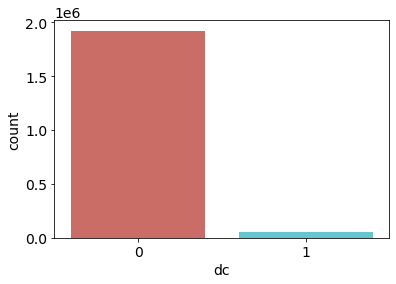

In [28]:
sns.countplot(x='dc',data=df_rdc,palette='hls')
plt.show()

In [50]:
df_rdc.groupby('sexe').mean()

,an,mois,lum,agg,atm,lat,long,year,cp,h24,...,surf,situ,place,catu,grav,trajet,secu,dc,age,catv
sexe,,,,,,,,,,,,,,,,,,,,,
1,11.116906,6.680718,1.950964,1.652693,1.544530,3.445239e+06,9.634889e+06,2011.116906,59721.998037,27.84813,...,1.237410,1.160163,1.209532,1.245545,2.418645,3.245395,17.686453,0.030482,45.804692,12.211474
2,11.018265,6.686018,1.780250,1.663321,1.591019,3.509441e+06,1.844315e+06,2011.018265,58049.581957,27.32122,...,1.263171,1.144257,1.434244,1.541843,2.705774,2.865687,17.310462,0.019498,47.727152,9.257169


In [30]:
pd.crosstab(df_rdc["dc"],df_rdc["trajet"],margins=True)

trajet,0,1,2,3,4,5,9,All
dc,,,,,,,,
0,552500,251243,40325,48143,191621,704230,134594,1922656
1,12062,5822,608,2031,1988,26504,4102,53117
All,564562,257065,40933,50174,193609,730734,138696,1975773


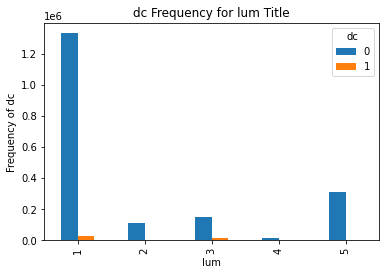

In [31]:
plt.figure(figsize=(10,10))
%matplotlib inline
pd.crosstab(df_rdc.lum,df_rdc.dc).plot(kind='bar')
plt.title('dc Frequency for lum Title')
plt.xlabel('lum')
plt.ylabel('Frequency of dc')
#plt.savefig('purchase_fre_job')
plt.show()

Text(0, 0.5, 'Frequency of dc')

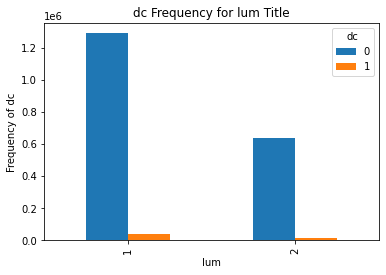

In [32]:
%matplotlib inline
pd.crosstab(df_rdc.sexe,df_rdc.dc).plot(kind='bar')
plt.title('dc Frequency for lum Title')
plt.xlabel('lum')
plt.ylabel('Frequency of dc')

Text(0, 0.5, 'Frequency of dc')

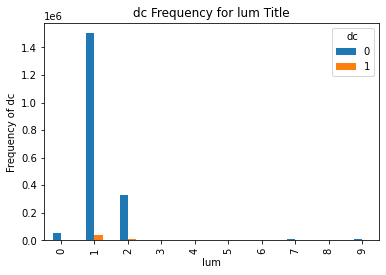

In [33]:
plt.figure(figsize=(10,10))
%matplotlib inline
pd.crosstab(df_rdc.surf,df_rdc.dc).plot(kind='bar')
plt.title('dc Frequency for lum Title')
plt.xlabel('lum')
plt.ylabel('Frequency of dc')


In [ ]:
#### plt.scatter(df_rdc.Long,df_rdc.Lat,c = df_rdc.dc)

#  Test de student:

In [ ]:
# TEST DE STUDENT POUR LES EXPLICATIVES QUANTI

In [223]:
from scipy import stats


In [248]:
stats.ttest_ind(df_rdc.loc[df_rdc.dc=='1','age'],df_rdc.loc[df_rdc.dc=='0','age'])

Ttest_indResult(statistic=73.37265797898313, pvalue=0.0)

In [249]:
stats.ttest_ind(df_rdc.loc[df_rdc.dc=='1','cp'],df_rdc.loc[df_rdc.dc=='0','cp'])


Ttest_indResult(statistic=-50.64620394236335, pvalue=0.0)

In [250]:
stats.ttest_ind(df_rdc.loc[df_rdc.dc=='1','h24'],df_rdc.loc[df_rdc.dc=='0','h24']) #, equal_var=False)

Ttest_indResult(statistic=-34.965401675188794, pvalue=9.129432629626245e-268)

# ==============    dichotomisation variables catégorielle  ============


In [18]:
#  EXPLICATIVES QUALITATIVES
#x_quali=df_rdc[['catv','place','catu','sexe','trajet','secu','catr','circ','surf','situ','lum','agg','atm']]
x_quali=df_rdc[['catr', 'catv','secu','lum','situ','trajet','circ','catu','atm']] # ,'place','surf'##

In [1685]:
#x_dicho = pd.get_dummies(x_quali.astype(str))
x_dicho = pd.get_dummies(x_quali.astype(str))

In [19]:
#data=x_dicho
data=x_quali

In [21]:
#data[['dc','age','h24','sexe','year','agg']]=df_rdc[['dc','age','h24','sexe','year','agg']]# ,

/home/fitec/.local/lib/python3.6/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [1688]:
#data=df_rdc[['dc','age','h24','sexe','year','agg',]]

In [1689]:
data[['dc','age','sexe']]=df_rdc[['dc','age','sexe']]

In [1690]:
#data.info()

In [1691]:
#data.dc.value_counts()

In [1692]:
#data.dc.value_counts(normalize=True)

In [22]:
# EXPLICATIVES
x_var= data.loc[:, data.columns != 'dc']
y=data.dc

In [ ]:
#y=df_rdc.dc
#x=df_rdc.loc[:, df_rdc.columns != 'dc']

#x=df_rdc.drop(columns=['dc','Num_Acc','an','mois','jour','hrmn','com','gps','dep','an_nais','num_veh','grav','lat','long'])

In [ ]:
#x.info()

In [ ]:

y=data.dc

In [1015]:
#importation de l'outil pour l'ajout d'une constante
from statsmodels.tools import add_constant
import statsmodels.api as sm

#données X avec la constante
#x_varBis = sm.tools.add_constant(x)
#x_var=normalize(x_var.values)
x_var = sm.tools.add_constant(x_var)



In [1016]:
#x_var.info()

# ===================>  statModel ===============================#

In [ ]:
# Modélisation sur l'ensemble de l'echantillon

In [336]:
#y=data.loc[0:1000,'dc']
#xvar=x_var.loc[0:1000,:]

In [23]:
x_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142173 entries, 0 to 2142172
Data columns (total 14 columns):
 #   Column  Dtype  
---  ------  -----  
 0   catr    int64  
 1   catv    int64  
 2   secu    int64  
 3   lum     int64  
 4   situ    int64  
 5   trajet  int64  
 6   circ    int64  
 7   catu    int64  
 8   atm     int64  
 9   age     float64
 10  h24     float64
 11  sexe    int64  
 12  year    float64
 13  agg     int64  
dtypes: float64(3), int64(11)
memory usage: 245.2 MB


In [24]:
#import statsmodels.api as sm
from statsmodels.api import Logit
#model=sm.Logit(df_rdc.dc,x_varBis)

model=Logit(y.astype(int),x_var)

#model=Logit(df_rdc.dc,x_var)

result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.109651
         Iterations 9
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.114      
Dependent Variable: dc               AIC:              469811.5716
Date:               2020-10-15 21:20 BIC:              469987.6542
No. Observations:   2142173          Log-Likelihood:   -2.3489e+05
Df Model:           13               LL-Null:          -2.6503e+05
Df Residuals:       2142159          LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
catr      0.0901     0.0038     23.7660   0.0000    0.0826    0.0975
catv      0.0140     0.0003     42.2972   0.0

In [ ]:
# VISUALISE on Y/X
plt.scatter(df_rdc.age,data.dc,c=y)
plt.show()

In [81]:
# ODD RATIO
#np.exp(result.params)

In [175]:
np.asarray(data)

array([[0, 0, 0, ..., 2005.0, 19.0, 59011.0],
       [0, 0, 0, ..., 2005.0, 19.0, 59011.0],
       [0, 0, 0, ..., 2005.0, 19.0, 59011.0],
       ...,
       [0, 0, 0, ..., 2018.0, 19.0, 97611.0],
       [0, 0, 0, ..., 2018.0, 14.0, 97611.0],
       [0, 0, 0, ..., 2018.0, 14.0, 97611.0]], dtype=object)

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976170 entries, 0 to 1976169
Columns: 131 entries, catv_01 to cp
dtypes: category(1), float64(4), uint8(126)
memory usage: 314.7 MB


# prediction par echantillon apprentissage - test

In [1694]:
# TRAINING & TEST DATA 
X_train, X_test, y_train, y_test = train_test_split(x_var, y, test_size=0.3, random_state=1,stratify=data.dc)
df_train, df_test= train_test_split(data, test_size=0.3, random_state=1,stratify=data.dc)

In [242]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383314 entries, 489441 to 445125
Columns: 118 entries, catv_1 to agg
dtypes: float64(4), int64(2), object(1), uint8(111)
memory usage: 230.9+ MB


In [829]:
logit_model=Logit(y_train.astype(float),X_train)

result=logit_model.fit()
print(result.summary2())

In [104]:
X_train.shape

(1383314, 130)

In [30]:
X_test.shape

(592850, 130)

In [1288]:
X_train.head()

,age,h24,sexe,year,agg
489441,38.0,18.0,1,2007.0,1
669752,61.0,16.0,1,2008.0,2
766159,81.0,8.0,1,2010.0,1
1718029,46.0,6.0,1,2017.0,1
91817,29.0,14.0,2,2005.0,1


# =======================  SKlearn ==============================

In [1695]:
from sklearn import preprocessing
from sklearn.metrics import classification_report

#instanciation
lr = LogisticRegression(penalty='none',solver='newton-cg')
#X_train=X_train.head(100)

#y_train=y_train.head(100)



#normalisation
stds = preprocessing.StandardScaler()
#transformation
X_Train = stds.fit_transform(X_train)
X_test= stds.fit_transform(X_test)

In [1696]:
#lrSk.fit(data.loc[:, data.columns != 'dc'],data.dc)
lr.fit(X_Train,y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [996]:
X_train.shape

(1383314, 54)

In [997]:
#affichage des coefficients
#print(pd.DataFrame({"var":X_train.columns,"coef":lr.coef_[0]}))

In [1126]:
y_pred = lr.predict(X_test)

In [1107]:
# PERFORMANCES

In [1108]:
#taux de reconnaissance --> 575257+953/total
print(metrics.accuracy_score(y_test,y_pred))

0.9731044952348823


In [1088]:
#Sensibilité 
print(metrics.recall_score(y_test,y_pred,pos_label='1'))

0.008406524466750314


In [555]:
#taux d'erreur --> 14987+1653/total
print(1.0 - metrics.accuracy_score(y_test,y_pred))

0.02690899890360121


In [1569]:
#précision – 93/(8+93)
print(metrics.precision_score(y_test,y_pred,pos_label='1'))

0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1697]:
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 97.3
              precision    recall  f1-score   support

           0   0.973598  0.999369  0.986315    576911
           1   0.455904  0.019134  0.036727     15940

    accuracy                       0.973013    592851
   macro avg   0.714751  0.509252  0.511521    592851
weighted avg   0.959678  0.973013  0.960783    592851



Predicted,0,1,All
Actual,,,
0,576547,364,576911
1,15635,305,15940
All,592182,669,592851


#  Arbre Decision

In [1698]:
from sklearn.tree import DecisionTreeClassifier
arbreFirst=DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10) #,max_leaf_nodes=5

In [1699]:
# Construction de l'arbre

arbreFirst.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30)

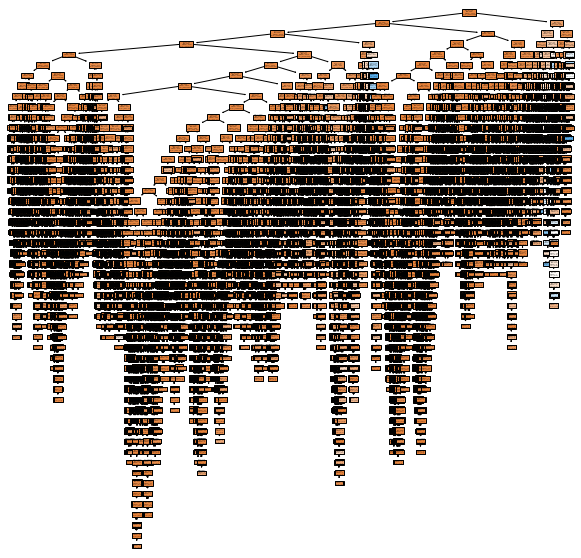

In [90]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(arbreFirst,feature_names=list(x_var.columns ),filled=True)
plt.show()

In [92]:
data.loc[:, data.columns != 'dc'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976164 entries, 0 to 1976163
Data columns (total 17 columns):
 #   Column  Dtype  
---  ------  -----  
 0   catv    int64  
 1   place   int64  
 2   catu    int64  
 3   trajet  int64  
 4   secu    int64  
 5   catr    int64  
 6   circ    int64  
 7   surf    int64  
 8   situ    int64  
 9   lum     int64  
 10  atm     int64  
 11  age     float64
 12  year    float64
 13  h24     float64
 14  cp      float64
 15  sexe    int64  
 16  agg     int64  
dtypes: float64(4), int64(13)
memory usage: 271.4 MB


In [1171]:
# Affichage sous forme de règles imbriquées de l’arbre
#plus facile à appréhender quand l'arbre est très grand
from sklearn.tree import export_text
tree_rules = export_text(arbreFirst,feature_names =list(data.loc[:, data.columns != 'dc']),show_weights=True)

In [285]:
#importance des variables
impVarFirst={"Variable":x_var.columns,"Importance":arbreFirst.feature_importances_}
print(pd.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False))

  Variable  Importance
7       cp    0.414673
4      age    0.207153
6      h24    0.125987
5     year    0.109733
9      agg    0.082107
2   catu_3    0.035524
8     sexe    0.013560
1   catu_2    0.008200
0   catu_1    0.002983
3   catu_4    0.000078


In [1700]:
#prédiction sur l'échantillon test
pred = arbreFirst.predict(X_test)
#distribution des predictions

print(np.unique(pred,return_counts=True))

(array(['0', '1'], dtype=object), array([592630,    221]))


In [1701]:

print(metrics.confusion_matrix(y_test,pred))

[[576776    135]
 [ 15854     86]]


# Indicateur de performance

In [1702]:
#taux de reconnaissance --> 575257+953/total
print(metrics.accuracy_score(y_test,pred))

0.9730303229647922


In [1503]:
pred2 = arbreFirst.predict(X_train)

In [1504]:
print(metrics.accuracy_score(y_train,pred2))

0.9741757836615548


In [811]:
y_train.shape

(1383314,)

In [745]:
# comaraison de l'accuracy entre train & test

In [143]:
#print(metrics.accuracy_score(y_train,X_train))

In [435]:
#taux d'erreur --> 14987+1653/total
print(1.0 - metrics.accuracy_score(y_test,pred))

0.05352618706249468


In [861]:
#rappel – sensibilité 953/14987+953
print(metrics.recall_score(y_test,pred,pos_label='1'))

0.014805520702634882


In [395]:
#précision – 93/(8+93)
print(metrics.precision_score(y_test,pred,pos_label='1'))

0.05265281420213839
